In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
fuel = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv',
                   error_bad_lines=False)
fuel

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [3]:
fuel.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [4]:
# Which of the following fuel type code has the lowest average fuel cost per unit burned?
print(fuel.groupby('fuel_type_code_pudl').mean()['fuel_cost_per_unit_burned'].sort_values(ascending= True))
print('Gas has the lowest average fuel cost per unit burned')

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64
Gas has the lowest average fuel cost per unit burned


In [5]:
# What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?
print('std is the standard deviation and 75% is the 75th percentile')
fuel['fuel_mmbtu_per_unit'].describe().round(2)

std is the standard deviation and 75% is the 75th percentile


count    29523.00
mean         8.49
std         10.60
min          0.00
25%          1.02
50%          5.76
75%         17.01
max        341.26
Name: fuel_mmbtu_per_unit, dtype: float64

In [6]:
# What is the skewness and kurtosis for the fuel quantity burned in two decimal places?
print('Skewness: ', fuel['fuel_qty_burned'].skew().round(2))
print ('Kurtosis', fuel['fuel_qty_burned'].kurt().round(2))

Skewness:  15.85
Kurtosis 651.37


In [7]:
# Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places?
# 
# (Enter answer in the format: Feature: xxx, Total: xxx, Percent: xxx)
print('missing value: ')
print(fuel.isnull().sum())
print('percentage missing value: ')
print((fuel.isnull().sum()/len(fuel)*100).round(3))

missing value: 
record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64
percentage missing value: 
record_id                       0.00
utility_id_ferc1                0.00
report_year                     0.00
plant_name_ferc1                0.00
fuel_type_code_pudl             0.00
fuel_unit                       0.61
fuel_qty_burned                 0.00
fuel_mmbtu_per_unit             0.00
fuel_cost_per_unit_burned       0.00
fuel_cost_per_unit_delivered    0.00
fuel_cost_per_mmbtu             0.00
dtype: float64


In [8]:
# The feature with missing values falls under what category? What missing value imputation technique would you use?
fuel.info()
# categorical and mode imputation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


<AxesSubplot:>

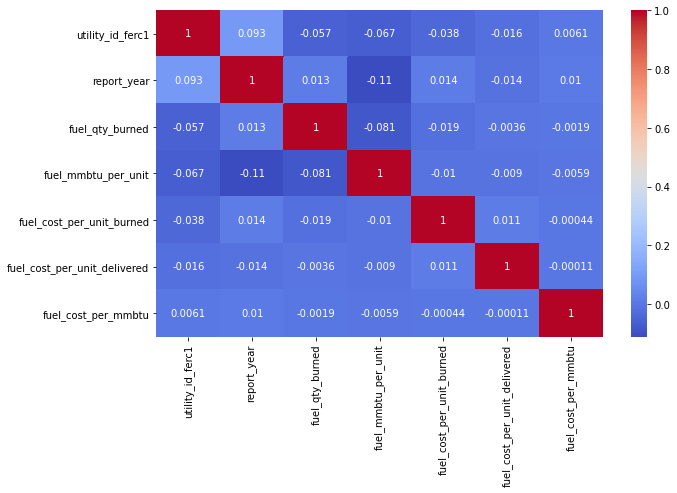

In [9]:
# Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?
plt.figure(figsize =(10,6))
sns.heatmap(fuel.corr(), annot = True, cmap ='coolwarm')

In [10]:
# For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?
a = fuel[(fuel['fuel_type_code_pudl']=='coal')&(fuel['report_year']==1998)]['fuel_cost_per_unit_burned'].sum()
b = fuel[(fuel['fuel_type_code_pudl']=='coal')&(fuel['report_year']==1994)]['fuel_cost_per_unit_burned'].sum()
print(a)
print(b)
change= a-b
print('change: ', change)
percentage_change = change/(a+b)*100
print('percentage_change: ',percentage_change)

11902.597
14984.572
change:  -3081.9750000000004
percentage_change:  -11.462623677487207


In [11]:
fuel.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [12]:
# Which year has the highest average fuel cost per unit delivered?
fuel.groupby('report_year').mean()['fuel_cost_per_unit_delivered'].sort_values(ascending = False)

report_year
1997    11140.197239
1996     9196.705948
2000      985.362877
2009      652.694163
2018      499.269966
2015      326.535511
1998      287.154420
2014      192.737183
2013      172.307591
2004      139.524275
2016      103.901761
2010       91.862105
1994       63.636060
2012       60.994502
2001       60.050396
2011       59.774667
2008       58.588197
2003       55.663493
2002       47.594361
2017       46.196861
2007       43.325023
2005       41.438184
2006       38.657484
1995       32.735269
1999       25.551627
Name: fuel_cost_per_unit_delivered, dtype: float64